In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import utils

In [2]:
df=pd.read_csv("C:/Users/ASUS/Downloads/kidney_disease.csv")

In [3]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
df.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [5]:
df["rbc"].value_counts()

normal      201
abnormal     47
Name: rbc, dtype: int64

In [6]:
df["rbc"].fillna("normal", inplace=True)


In [7]:
df["pc"].value_counts()

normal      259
abnormal     76
Name: pc, dtype: int64

In [8]:
df["pc"].fillna("normal", inplace=True)

In [9]:
df["pcc"].value_counts()

notpresent    354
present        42
Name: pcc, dtype: int64

In [10]:
df["pcc"].fillna("normal", inplace=True)

In [11]:
df["ba"].value_counts()

notpresent    374
present        22
Name: ba, dtype: int64

In [12]:
df["ba"].fillna("notpresent", inplace=True)

In [13]:
df["htn"].value_counts()

no     251
yes    147
Name: htn, dtype: int64

In [14]:
df["htn"].fillna("no", inplace=True)

In [15]:
df["dm"].value_counts()

no       258
yes      134
\tno       3
\tyes      2
 yes       1
Name: dm, dtype: int64

In [16]:
df["dm"].fillna("no", inplace=True)

In [17]:
df["cad"].value_counts()

no      362
yes      34
\tno      2
Name: cad, dtype: int64

In [18]:
df["cad"].fillna("no", inplace=True)

In [ ]:
df["appet"].value_counts()

good    317
poor     82
Name: appet, dtype: int64

In [ ]:
df["appet"].fillna("good", inplace=True)

In [ ]:
df["pe"].value_counts()

no     323
yes     76
Name: pe, dtype: int64

In [ ]:
df["pe"].fillna("no", inplace=True)

In [ ]:
df["ane"].value_counts()

no     339
yes     60
Name: ane, dtype: int64

In [ ]:
df["classification"].value_counts()

ckd       248
notckd    150
ckd\t       2
Name: classification, dtype: int64

In [ ]:
df["classification"].fillna("ckd", inplace=True)

In [ ]:
df.corr()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
id,1.000000,-0.185308,-0.245744,0.642156,-0.541993,-0.283416,-0.338673,-0.307175,-0.268683,0.364251,-0.092347,0.640298
age,-0.185308,1.000000,0.159480,-0.191096,0.122091,0.220866,0.244992,0.196985,0.132531,-0.100046,0.058377,-0.192928
bp,-0.245744,0.159480,1.000000,-0.218836,0.160689,0.222576,0.160193,0.188517,0.146222,-0.116422,0.075151,-0.306540
sg,0.642156,-0.191096,-0.218836,1.000000,-0.469760,-0.296234,-0.374710,-0.314295,-0.361473,0.412190,-0.072787,0.602582
al,-0.541993,0.122091,0.160689,-0.469760,1.000000,0.269305,0.379464,0.453528,0.399198,-0.459896,0.129038,-0.634632
su,-0.283416,0.220866,0.222576,-0.296234,0.269305,1.000000,0.717827,0.168583,0.223244,-0.131776,0.219450,-0.224775
bgr,-0.338673,0.244992,0.160193,-0.374710,0.379464,0.717827,1.000000,0.143322,0.114875,-0.267848,0.066966,-0.306189
bu,-0.307175,0.196985,0.188517,-0.314295,0.453528,0.168583,0.143322,1.000000,0.586368,-0.323054,0.357049,-0.610360
sc,-0.268683,0.132531,0.146222,-0.361473,0.399198,0.223244,0.114875,0.586368,1.000000,-0.690158,0.326107,-0.401670
sod,0.364251,-0.100046,-0.116422,0.412190,-0.459896,-0.131776,-0.267848,-0.323054,-0.690158,1.000000,0.097887,0.365183


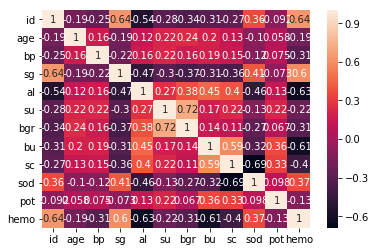

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
df["rbc"]=df["rbc"].astype("category").cat.codes
df["pc"]=df["pc"].astype("category").cat.codes
df["pcc"]=df["pcc"].astype("category").cat.codes
df["ba"]=df["ba"].astype("category").cat.codes
df["htn"]=df["htn"].astype("category").cat.codes
df["dm"]=df["dm"].astype("category").cat.codes
df["cad"]=df["cad"].astype("category").cat.codes
df["appet"]=df["appet"].astype("category").cat.codes
df["pe"]=df["pe"].astype("category").cat.codes
df["ane"]=df["ane"].astype("category").cat.codes
df["classification"]=df["classification"].astype("category").cat.codes

In [ ]:
df["pcv"]=pd.to_numeric(df['pcv'],errors='coerce')
df["rc"]=pd.to_numeric(df['pcv'],errors='coerce')
df["wc"]=pd.to_numeric(df['wc'],errors='coerce')

In [ ]:
df.isna().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc                 0
pc                  0
pcc                 0
ba                  0
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                71
wc                106
rc                 71
htn                 0
dm                  0
cad                 0
appet               0
pe                  0
ane                 0
classification      0
dtype: int64

In [ ]:
df1=df.fillna(df.mean())

In [ ]:
df1.isna().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [ ]:
outcome_corr=df.corr().iloc[:,-1].values.tolist()[:-1]
print(outcome_corr)
outcome_corr.sort(reverse=True)
meancrr=sum(outcome_corr)/len(outcome_corr)
print(meancrr)
allowedcol=[]
for i in outcome_corr:
    if i>meancrr:
        allowedcol.append(df.corr().iloc[:,-1].values.tolist()[:-1].index(i))
print(allowedcol)

[0.8367040141278671, -0.22236095111788817, -0.297019358222891, 0.7291165938752572, -0.6255854024549184, -0.34558910169864704, 0.2849105483735985, 0.3715743878690514, -0.28345547162621126, -0.1883702841250273, -0.4192448799766011, -0.38292043833680517, -0.3008940184434638, 0.3754607002160183, -0.08503497124407768, 0.7668317641506953, 0.7386033510049301, -0.23315371605384003, 0.7386033510049301, -0.5844505898652955, -0.39577770675931884, -0.2160398169431706, -0.38368854550284376, -0.3781649233048275, -0.3256643706821274]
-0.03302439342942426
[0, 15, 16, 16, 3, 13, 7, 6]


In [ ]:
fin=[]
col=df1.columns.tolist()
for i in col:
    if col.index(i) in allowedcol:
        fin.append(col[col.index(i)])

In [ ]:
df2=df1[fin]


In [ ]:
df2

,id,sg,rbc,pc,sod,hemo,pcv
0,0,1.020000,1,1,137.528754,15.400000,44.000000
1,1,1.020000,1,1,137.528754,11.300000,38.000000
2,2,1.010000,1,1,137.528754,9.600000,31.000000
3,3,1.005000,1,0,111.000000,11.200000,32.000000
4,4,1.010000,1,1,137.528754,11.600000,35.000000
5,5,1.015000,1,1,142.000000,12.200000,39.000000
6,6,1.010000,1,1,104.000000,12.400000,36.000000
7,7,1.015000,1,0,137.528754,12.400000,44.000000
8,8,1.015000,1,0,137.528754,10.800000,33.000000
9,9,1.020000,0,0,114.000000,9.500000,29.000000


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


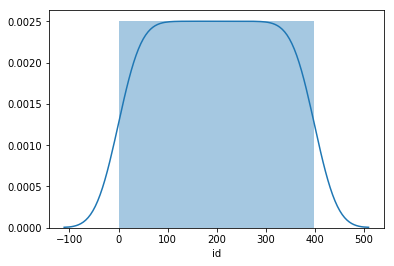

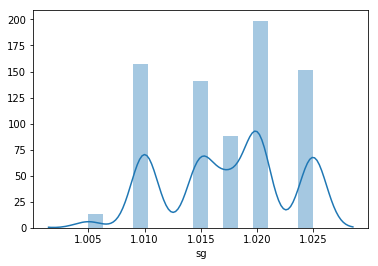

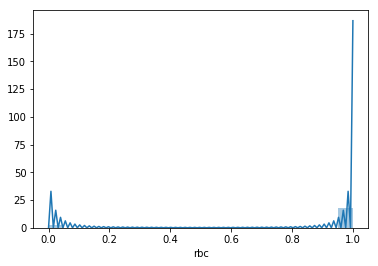

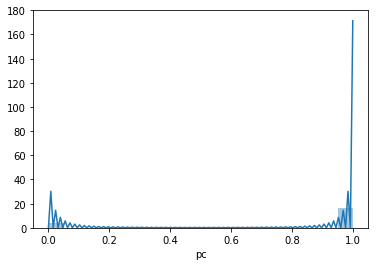

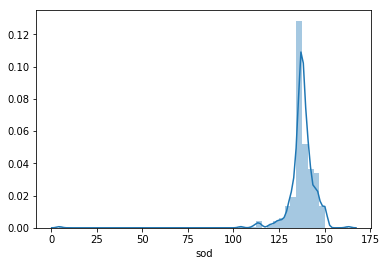

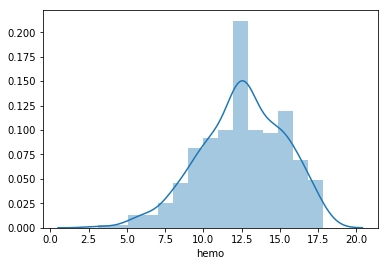

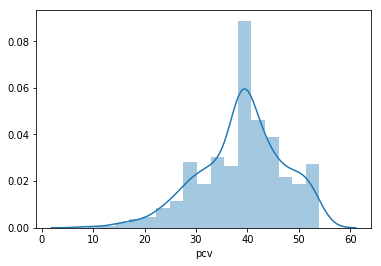

In [ ]:
for i in range(len(fin)):
    plt.figure()
    sns.distplot(df2[fin[i]])

In [ ]:
X=df2[["sg","rbc","pc","sod","hemo","pcv"]]

In [ ]:
y=df1[["classification"]]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=50)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
lm=RandomForestClassifier()
lm.fit(X_train,y_train)
predictions=lm.predict(X_test)
print(predictions)

[0 2 0 2 0 2 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 2 0 0 2 0 0 2
 2 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 0 0 2 0 0 0 0 0 0 2 0 2
 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 2 2 0 2 2 2 0 2 0 2 0 0 0
 0 0 0 0 2 0 0 0 0 0 0 0 0 2 2 2 2 0 2 0 0 0 2 0 0 2 2 0 2 2 0 0 0 2 0 0 2
 0 0 0 0 2 0 0 0 2 0 0 0]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
print(np.array(y_test.values.flatten().tolist()))
print(predictions)

[0 2 0 2 0 2 0 0 2 0 0 0 0 0 1 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 2 0 0 2 0 0 2
 2 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 2 0 0 2 0 0 0 0 0 0 2 0 2
 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 2 2 0 2 2 2 0 2 0 2 0 0 0
 0 0 0 2 2 0 0 0 0 0 0 0 0 2 2 2 2 0 2 0 0 0 2 0 0 2 2 0 2 2 0 0 0 2 0 0 2
 0 0 0 0 2 0 0 0 2 0 0 0]
[0 2 0 2 0 2 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 2 0 0 2 0 0 2
 2 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 0 0 2 0 0 0 0 0 0 2 0 2
 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 2 2 0 2 2 2 0 2 0 2 0 0 0
 0 0 0 0 2 0 0 0 0 0 0 0 0 2 2 2 2 0 2 0 0 0 2 0 0 2 2 0 2 2 0 0 0 2 0 0 2
 0 0 0 0 2 0 0 0 2 0 0 0]


In [ ]:
pd.crosstab(np.array(y_test.values.flatten().tolist()),predictions,rownames=['True'],colnames=['predicted'],margins=True)

predicted,0,2,All
True,,,
0,112,0,112
1,1,0,1
2,2,45,47
All,115,45,160


In [ ]:
from tkinter import *
windows=Tk()
windows.title("print text")
windows.geometry('375x450')
windows.configure(bg="maroon")
lb1=Label(windows,text="enter Sg",bg="maroon",fg="black",font=("Times new Roman Bold",20))
lb2=Label(windows,text="enter rbc",bg="maroon",fg="black",font=("Times new Roman Bold",20))
selected1=IntVar()
red1=Radiobutton(windows,text='normal',value=1,variable=selected1,bg="maroon",fg="black",font=("Times new Roman Bold",15))
red1.grid(row=2,column=0)
red2=Radiobutton(windows,text='abnormal',value=0,variable=selected1,bg="maroon",fg="black",font=("Times new Roman Bold",15))
red2.grid(row=3,column=0)
lb3=Label(windows,text="enter pc",bg="maroon",fg="black",font=("Times new Roman Bold",20))
selected2=IntVar()
red1=Radiobutton(windows,text='normal',value=1,variable=selected2,bg="maroon",fg="black",font=("Times new Roman Bold",15))
red1.grid(row=5,column=0)
red2=Radiobutton(windows,text='abnormal',value=0,variable=selected2,bg="maroon",fg="black",font=("Times new Roman Bold",15))
red2.grid(row=6,column=0)
lb4=Label(windows,text="enter sod",bg="maroon",fg="black",font=("Times new Roman Bold",20))
lb5=Label(windows,text="enter hemo",bg="maroon",fg="black",font=("Times new Roman Bold",20))
lb6=Label(windows,text="enter pcv:",bg="maroon",fg="black",font=("Times new Roman Bold",20))
lb7=Label(windows,text="",bg="maroon")
lb8=Label(windows,text="",bg="maroon")
lb1.grid(row=0,column=0)
lb2.grid(row=1,column=0)
lb3.grid(row=4,column=0)
lb4.grid(row=7,column=0)
lb5.grid(row=8,column=0)
lb6.grid(row=9,column=0)
lb7.grid(row=11,column=0)
lb8.grid(row=11,column=0)
ent1=Entry(windows,width=15)
ent1.grid(column=1,row=0)
ent4=Entry(windows,width=15)
ent4.grid(column=1,row=7)
ent7=Entry(windows,width=15)
ent7.grid(column=1,row=8)
ent8=Entry(windows,width=15)
ent8.grid(column=1,row=9)
def click():
        pred=lm.predict([[ent1.get(),ent4.get(),selected1.get(),selected2.get(),ent7.get(),ent8.get()]])
        if(pred[0]==1):
            print("you have a chance of kidny disease!!please consult with your doctor")
        else:
            print("congratulation!!you have no problem in your kidney")
        lb7.configure(text="submitted sucessfully",bg="maroon",fg="red",font=("Times new Roman Bold",20))
btn=Button(windows,text="submit",fg="black",bg="blue",width=15,font=("Times new Roman Bold",20),command=click)
btn.grid(row=10,column=0)
windows.mainloop()

congratulation!!you have no problem in your kidney


In [ ]:
from sklearn import metrics
print("model source:",lm.score(X_test,y_test))#236/208

In [ ]:
#logisticregression classifier

In [ ]:
from sklearn.linear_model import LogisticRegression
lm=LogisticRegression()
lm.fit(X_train,y_train)
predictions=lm.predict(X_test)
print(predictions)

In [ ]:
pd.crosstab(np.array(y_test.values.flatten().tolist()),predictions,rownames=['True'],colnames=['predicted'],margins=True)

In [ ]:
from sklearn import metrics
print("model source:",lm.score(X_test,y_test))#236/208

In [ ]:
#decision tree classifier


In [ ]:
from sklearn.tree import DecisionTreeClassifier
lm=DecisionTreeClassifier()
lm.fit(X_train,y_train)
predictions=lm.predict(X_test)
print(predictions)

In [ ]:
from sklearn import metrics
print("model source:",lm.score(X_test,y_test))#236/208

In [ ]:
#knn

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
predictions=knn.predict(X_test)
print(predictions)

In [ ]:
from sklearn import metrics
print("model source:",knn.score(X_test,y_test))#236/208

In [ ]:
#gridsearchcv

In [ ]:
from sklearn.model_selection import GridSearchCV
knn2=KNeighborsClassifier()
param_grid={"n_neighbors":np.arange(1,25)}
knn_gscv=GridSearchCV(knn2,param_grid,cv=3)
knn_gscv.fit(X,y)
print(knn_gscv)

In [ ]:
#cross validation
from sklearn.model_selection import cross_val_score
knn_cv=knn=KNeighborsClassifier(n_neighbors=2)
cv_scores=cross_val_score(knn_cv,X,y,cv=5)
print(cv_scores)

In [ ]:
print("cv_scores mean:{}".format(np.mean(cv_scores)))